In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# Create date index for 4 factor data set
df = pd.read_csv('mutualfund.csv')
dates = pd.to_datetime(df['caldt'],format='%Y%m%d')
df['Date'] = dates
df = df[df['mret']!='R']
df['mret']=df.mret.astype(float)
ptable = df.pivot_table(index='Date', columns = 'ticker', values = 'mret')
ptable.sort_index()
    
fulldateindex = ptable.index

# Concatenate 4-factor model, set index to mutual fund date index
ff = pd.read_csv('famafrench.csv')
mom = pd.read_csv('momentum.csv')
fourfactor = pd.concat([ff,mom],axis=1).dropna()
fourfactor = fourfactor.set_index(fulldateindex)
fourfactor = fourfactor.drop(columns='Date')
columnnames = ['MRP','SMB','HML','Rf','MOM']
fourfactor.columns = columnnames
print(fourfactor)

               MRP     SMB     HML      Rf     MOM
Date                                              
1980-01-31  0.0551  0.0165  0.0180  0.0080  0.0751
1980-02-29 -0.0122 -0.0182  0.0062  0.0089  0.0788
1980-03-31 -0.1290 -0.0664 -0.0106  0.0121 -0.0959
1980-04-30  0.0397  0.0097  0.0106  0.0126 -0.0042
1980-05-30  0.0526  0.0216  0.0039  0.0081 -0.0111
...            ...     ...     ...     ...     ...
2019-08-30 -0.0258 -0.0241 -0.0499  0.0016  0.0760
2019-09-30  0.0144 -0.0090  0.0671  0.0018 -0.0685
2019-10-31  0.0206  0.0025 -0.0207  0.0015  0.0024
2019-11-29  0.0387  0.0087 -0.0186  0.0012 -0.0262
2019-12-31  0.0277  0.0068  0.0183  0.0014 -0.0213

[480 rows x 5 columns]


In [3]:
# Step 1: Generate full data set for specified bear/bull period
# Includes sorting and observation data

def full_data(filename,startdate,enddate,fourfactor):
    # Generate FULL mutual fund dataset
    df = pd.read_csv(filename)
    dates = pd.to_datetime(df['caldt'],format='%Y%m%d')
    df['Date'] = dates
    df = df[df['mret']!='R']
    df['mret']=df.mret.astype(float)
    
    # Remove funds with AUM < 50m
    fundinfo = pd.read_csv('fundinfo.csv')
    fund_subset = fundinfo[fundinfo['AUM']>=50]
    
    df = df.merge(fund_subset,how='inner',left_on='ticker',right_on='Ticker')
    
    ptable = df.pivot_table(index='Date', columns = 'ticker', values = 'mret')
    ptable.sort_index()
    
    ptable1 = ptable.loc[startdate:enddate]
    
    ptable2 = ptable1.dropna(axis=1)
    
    # Combine FULL mutual fund and 4 factor datasets 
    # full_data is the FULL dataset
    dateindex = ptable2.index
    ff = fourfactor.loc[dateindex]
    full_data = pd.concat([ptable2, ff],axis=1)
    
    # Generate mutual fund excess returns
    tickerlist = full_data.columns
    for i in range(len(full_data)-5):
        full_data[tickerlist[i]] = full_data[tickerlist[i]] - full_data['Rf']
        
    return full_data


In [4]:
bear1_full = full_data('mutualfund.csv','1999-03','2002-10',fourfactor)
bear1_full

,AADEX,ACAPX,ACEHX,ACGIX,ACSTX,AGBBX,AGTHX,ALARX,ALBAX,ALGRX,...,WMKGX,WOGSX,WPSGX,WPVLX,WVALX,MRP,SMB,HML,Rf,MOM
Date,,,,,,,,,,,,,,,,,,,,,
1999-03-31,0.016679,0.112276,0.016927,0.014732,0.009094,0.023837,0.021175,0.134501,0.047828,0.068136,...,0.086712,0.055303,0.009517,0.036067,0.031936,0.0345,-0.0392,-0.0265,0.0043,-0.0129
1999-04-30,0.100620,0.004457,0.033980,0.064709,0.109834,0.034566,0.029142,0.035774,0.003883,-0.002505,...,0.042793,-0.017253,-0.012659,0.066816,0.069955,0.0433,0.0400,0.0253,0.0037,-0.0906
1999-05-28,-0.003877,-0.065698,-0.057837,0.003888,0.002360,-0.007832,0.007199,-0.053367,-0.030495,-0.048773,...,0.017999,-0.025016,-0.060967,0.003158,0.000904,-0.0246,0.0342,0.0240,0.0034,-0.0528
1999-06-30,0.011274,0.069339,0.069393,0.039805,-0.001586,0.053638,0.071837,0.076571,0.056856,0.096415,...,0.078501,0.108035,0.059531,0.022276,0.019999,0.0477,0.0305,-0.0360,0.0040,0.0488
1999-07-30,-0.045173,-0.048012,0.002424,-0.020673,-0.048525,-0.032821,-0.015424,-0.038306,-0.024218,-0.040428,...,0.005884,-0.036360,-0.054384,-0.008243,-0.008457,-0.0349,0.0267,-0.0076,0.0038,0.0150
1999-08-31,-0.040192,0.026378,0.051633,-0.026616,-0.032712,-0.038351,-0.009970,0.030464,-0.011840,-0.020195,...,0.009993,0.024452,0.001954,-0.030649,-0.032897,-0.0138,-0.0127,-0.0131,0.0039,0.0292
1999-09-30,-0.063442,0.018957,-0.077944,-0.038719,-0.035367,-0.023276,-0.008098,0.012711,-0.003900,-0.009421,...,-0.012533,-0.008025,-0.008446,0.012326,0.012598,-0.0279,0.0334,-0.0339,0.0039,0.0645
1999-10-29,0.007464,0.055956,0.054428,0.064233,0.045427,0.065980,0.060876,0.054270,0.044124,0.055323,...,0.036740,0.105165,0.070802,0.064584,0.070918,0.0612,-0.0695,-0.0289,0.0039,0.0548
1999-11-30,-0.025002,0.109352,0.020804,0.003432,-0.023747,0.050905,0.039597,0.118698,0.035063,0.057553,...,0.037371,0.053116,-0.005982,-0.011437,-0.012199,0.0337,0.0737,-0.0651,0.0036,0.0561


In [5]:
# Step 2: Sorting of tickers by one-year returns prior to observation


def sortingdata(full_data,sortstart,sortend):    
    sorting_data = full_data[sortstart:sortend]
    sorting_data = sorting_data.drop(columns=['MRP','SMB','HML','Rf','MOM'])
    sorted_mean = sorting_data.mean().sort_values()
   
    sorting_mean_df = pd.concat([sorted_mean,pd.qcut(sorted_mean,10,labels=np.arange(10,0,-1))],axis=1)
    sorting_mean_df.columns = ['Monthly Excess Returns','Rank']
    
    return sorting_mean_df

In [28]:
# Mean excess returns by decile
bear1_sorting = sortingdata(bear1_full,'1999-03','2000-03')
bear1_sorting.groupby('Rank').mean()


,Monthly Excess Returns
Rank,
10,-0.000873
9,0.005471
8,0.009016
7,0.013144
6,0.016129
5,0.017707
4,0.020996
3,0.027165
2,0.034384


In [7]:
# Split into 10 deciles
def split_portfolios(sorting_list):
    portfolios = {}
    for i in range(1,11):
        list = sorting_list[sorting_list['Rank'] == i]
        rankedtickerlist = list.index
        portfolios[i] = rankedtickerlist
    return portfolios

In [8]:
bear1_portfolios = split_portfolios(bear1_sorting)
bear1_portfolios

{1: Index(['DUGAX', 'SMMIX', 'CMNWX', 'VPMCX', 'WOGSX', 'BLUEX', 'MEGBX', 'JARTX',
        'JACAX', 'EKOAX', 'PSTAX', 'ACAPX', 'OSTFX', 'FDFFX', 'SPECX', 'SHRAX',
        'ALARX', 'HCAYX', 'PARNX', 'FOCPX', 'PNOPX', 'DVEAX', 'WALLX', 'FDGRX',
        'MONTX', 'RYOCX', 'FMILX', 'USAUX', 'CVGRX', 'VHCOX', 'TWGTX', 'MNNAX',
        'POGSX'],
       dtype='object'),
 2: Index(['SHFVX', 'TVAFX', 'TWCUX', 'FKDNX', 'TWCGX', 'MIGFX', 'FPPFX', 'UMLGX',
        'MSEQX', 'WMKGX', 'NFEPX', 'GABGX', 'PGWCX', 'JAGRX', 'PJFAX', 'TAGRX',
        'MFOCX', 'FDCAX', 'PLGIX', 'USBOX', 'RBCGX', 'HACAX', 'MGRIX', 'EKJAX',
        'BUFGX', 'AGTHX', 'OTGBX', 'MASPX', 'NEFSX', 'TGCEX', 'POGAX', 'LSGRX'],
       dtype='object'),
 3: Index(['PRBLX', 'CSIEX', 'VALLX', 'BURHX', 'SBLGX', 'MFRFX', 'CHTRX', 'MSEFX',
        'SWANX', 'ALGRX', 'DTLGX', 'FIUTX', 'GEGTX', 'TIGRX', 'MSOAX', 'PINDX',
        'SNIGX', 'TLGUX', 'EVTMX', 'OFALX', 'PXWGX', 'FTQGX', 'VTCIX', 'SELCX',
        'FTRNX', 'GCGIX', 'EQPGX', 'FEXPX', 

In [9]:
# Portfolio Characteristics: Average AUM, Expense Ratio
def portfolio_char(split_portfolios):
    full_char = {}
    for i in range(1,11):
        fundinfo = pd.read_csv('fundinfo.csv')
        fund_char = fundinfo.merge(split_portfolios[i].to_frame(), left_on='Ticker', right_index=True)
        fund_char.set_index('Ticker')
        fund_char['Expense Ratio'] = fund_char['Expense Ratio'].astype(float)
        full_char['{}'.format(i)] = fund_char.mean()
    
    return pd.DataFrame(full_char).transpose()


In [10]:
portfolio_char(bear1_portfolios)

,AUM,Expense Ratio
1,7030.071818,0.010512
2,10135.544375,0.010294
3,2843.172500,0.009516
4,39257.088485,0.007645
5,29702.676250,0.007809
6,4230.730938,0.004991
7,2787.975758,0.009445
8,7050.097500,0.008722
9,3220.107813,0.008894
10,9567.611212,0.009303


In [35]:
# Plot returns for each decile on observation period
# full_data
# split_portfolios
def obsgraph(full_data,split_portfolios,start,end):

    full_graph = []
    bear1_observation = full_data[start:end]
    for i in range(1,11):
        returns_graph = bear1_observation[split_portfolios[i]] + 1
        returns_graph = returns_graph.cumprod().mean(axis=1)
        full_graph.append(returns_graph)

    full_graph = pd.DataFrame(full_graph)
    full_graph.index = [['1','2','3','4','5','6','7','8','9','10']]
    full_graph = full_graph.transpose()

    full_graph.plot(figsize=(10,8))
    plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.9), shadow=True, ncol=1)
    plt.xlabel('Year')
    plt.ylabel('Cumulative Returns')
    plt.grid()
    
    return full_graph.mean()

,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,
2000-04-28,0.955227,0.947134,0.959862,0.962355,0.971361,0.973563,0.983333,0.995886,0.994425,1.006785
2000-05-31,0.874995,0.900572,0.922236,0.931468,0.950272,0.960506,0.974484,1.003764,0.997404,1.031775
2000-06-30,0.981045,0.948483,0.966064,0.975336,0.969459,0.979716,0.978015,0.998376,0.976538,0.997102
2000-07-31,0.944300,0.933560,0.948044,0.956165,0.955929,0.966018,0.969745,0.998430,0.984615,1.007011
2000-08-31,1.057476,1.008435,1.019136,1.025762,1.012499,1.028600,1.029137,1.058266,1.041745,1.058351
2000-09-29,0.988017,0.949126,0.964109,0.964492,0.963891,0.979111,1.001849,1.036986,1.029996,1.066886
2000-10-31,0.919852,0.914460,0.939766,0.948039,0.960022,0.979057,1.006109,1.054251,1.053127,1.093482
2000-11-30,0.766539,0.813048,0.845158,0.858267,0.891442,0.905903,0.953298,1.003314,1.010651,1.072992
2000-12-29,0.786102,0.827577,0.862580,0.872658,0.906328,0.918944,0.989255,1.041730,1.064652,1.133870


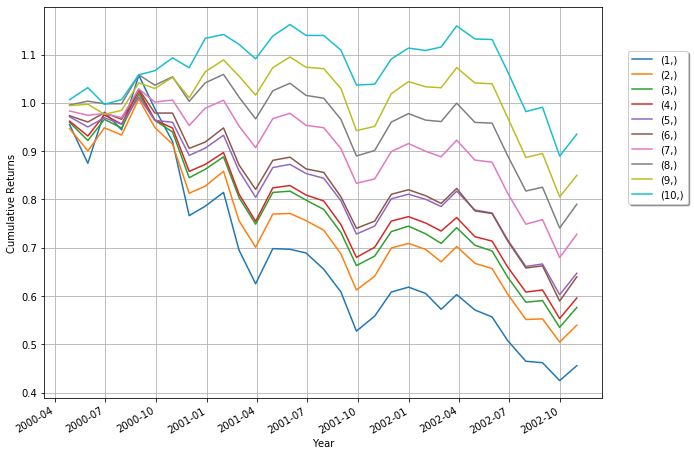

In [36]:
obsgraph(bear1_full,bear1_portfolios,'2000-04','2002-10')

In [13]:
#### Regression for decile portfolios
# portfolios: split_portfolios function
# full_data: full_data function
def regress(portfolios,full_data,start,end): 
    decile_portfolios = portfolios 
    sorted_portfolio = full_data[decile_portfolios[5]][start:end] # obs start - end 
    sorted_portfolio_combined = sorted_portfolio.mean(axis=1)
# Merging series with dataframe 
    observation_df = fourfactor.merge(sorted_portfolio_combined.to_frame(), left_index=True, right_index=True)
    observation_df.columns = ['MRP','SMB','HML','Rf','MOM','Returns']

# Regression: CAPM and 4-Factor
    results_ff = smf.ols('Returns ~ MRP + SMB + HML + MOM',data=observation_df).fit()
    results_capm = smf.ols('Returns ~ MRP',data=observation_df).fit()
    return results_capm.summary(), results_ff.summary()

In [14]:
regress(bear1_portfolios,bear1_full,'2000-04','2002-10')

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                Returns   R-squared:                       0.963
 Model:                            OLS   Adj. R-squared:                  0.962
 Method:                 Least Squares   F-statistic:                     764.8
 Date:                Sun, 19 Apr 2020   Prob (F-statistic):           2.16e-22
 Time:                        18:13:48   Log-Likelihood:                 100.61
 No. Observations:                  31   AIC:                            -197.2
 Df Residuals:                      29   BIC:                            -194.3
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [38]:
# Long/Short Portfolios
# Sorting Data
long_portfolio = bear1_portfolios[1]
short_portfolio = bear1_portfolios[10]
long_minus_short_sort = bear1_full[long_portfolio]['1999-03':'2000-03'].mean(axis=1) - bear1_full[short_portfolio]['1999-03':'2000-03'].mean(axis=1)

# Observation Data
long_minus_short_obs = bear1_full[long_portfolio]['2000-04':'2002-10'].mean(axis=1) - bear1_full[short_portfolio]['2000-04':'2002-10'].mean(axis=1)
long_minus_short_obs
observation_df = fourfactor.merge(long_minus_short_obs.to_frame(), left_index=True, right_index=True)
observation_df.columns = ['MRP','SMB','HML','Rf','MOM','Returns']

# Regression: CAPM and 4-Factor
results_ff = smf.ols('Returns ~ MRP + SMB + HML + MOM',data=observation_df).fit()
results_capm = smf.ols('Returns ~ MRP',data=observation_df).fit()
results_capm.summary(), results_ff.summary()

print(bear1_full[long_portfolio]['2000-04':'2002-10']), print(bear1_full[short_portfolio]['2000-04':'2002-10'])

               DUGAX     SMMIX     CMNWX     VPMCX     WOGSX     BLUEX  \
Date                                                                     
2000-04-28 -0.102421 -0.086797 -0.074613 -0.017067 -0.026015 -0.029312   
2000-05-31 -0.062241 -0.065596 -0.043195 -0.047923 -0.045728 -0.086322   
2000-06-30  0.084071  0.116523  0.089525  0.039831  0.161928  0.018590   
2000-07-31 -0.004082 -0.013687 -0.007958 -0.016136 -0.005171 -0.055404   
2000-08-31  0.136783  0.128794  0.081853  0.074159  0.097997  0.089697   
2000-09-29 -0.046417 -0.044564 -0.073839 -0.087228 -0.075395 -0.081719   
2000-10-31 -0.083648 -0.082429 -0.060634 -0.023709 -0.037837  0.041330   
2000-11-30 -0.143889 -0.180982 -0.091769 -0.078516 -0.153147 -0.056069   
2000-12-29  0.039731  0.025462  0.062804  0.034859 -0.029593  0.037738   
2001-01-31  0.012911  0.000000  0.078182  0.039086  0.039321 -0.059444   
2001-02-28 -0.126304 -0.207584 -0.101137 -0.120816 -0.249275 -0.033708   
2001-03-30 -0.107427 -0.120843 -0.0574

(None, None)